In [4]:
import xarray as xr
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Load FSLE dataset (downloaded from AVISO)

In [5]:
da = xr.open_dataset("/home/z3526974/hdrive/data/dipole_work/dataset-duacs-dt-global-allsat-madt-fsle_1543203294191.nc")
da

<xarray.Dataset>
Dimensions:    (lat: 176, lon: 251, time: 21)
Coordinates:
  * time       (time) datetime64[ns] 2017-09-10 2017-09-11 ... 2017-09-30
  * lat        (lat) float32 -37.98 -37.94 -37.9 -37.86 ... -31.06 -31.02 -30.98
  * lon        (lon) float32 145.5 145.54 145.58 145.62 ... 155.42 155.46 155.5
Data variables:
    fsle_max   (time, lat, lon) float32 ...
    theta_max  (time, lat, lon) float32 ...
Attributes:
    _NCProperties:              version=1|netcdflibversion=4.4.1|hdf5libversi...
    cdm_data_type:              Grid
    Conventions:                CF-1.6
    standard_name_vocabulary:   http://cf-pcmdi.llnl.gov/documents/cf-standar...
    title:                      Backward-in-time, finite-size Lyapunov expone...
    geospatial_lat_min:         -37.97999954223633
    geospatial_lat_max:         -30.979999542236328
    geospatial_lon_min:         145.5
    geospatial_lon_max:         155.5
    geospatial_vertical_min:    0.0
    geospatial_vertical_max:    0.0
   

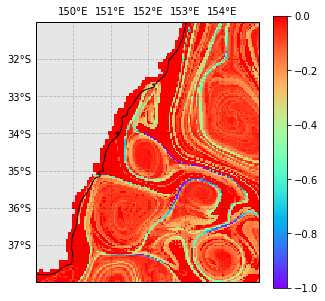

In [47]:
plt.figure(figsize=(5, 5))
ax1 = plt.axes(projection=ccrs.PlateCarree())
plt.pcolormesh(da.lon, da.lat, da.fsle_max.sel(time="2017-09-30"), vmin=-1, vmax=0, cmap='rainbow',
             transform=ccrs.PlateCarree())
plt.colorbar()

ax1.coastlines(resolution='50m')
ax1.set_extent([149, 155, -38, -31])
gl = ax1.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
#plt.text(-31.5,145.5,'FSLE 15/9')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_bottom = False
ax1.add_feature(cfeature.LAND, facecolor='0.9') #Grayscale colors can be set using 0 (black) to 1 (white)
ax1.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
ax1.add_feature(cfeature.BORDERS, zorder=10)

savefig('dipole_fsle_30_09.png', dpi=300,bbox_inches='tight')